In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt #date and time
import seaborn as sns #plotting graphical objects
import matplotlib.pyplot as plt


In [3]:
alumni_filepath = 'https://raw.githubusercontent.com/Africa-Data-School/ADS-Assignment-1/main/alumni.csv'
alumni_data = pd.read_csv(alumni_filepath)

In [4]:
#head() returns the first n rows of an object
alumni_data.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000"
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000"
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000"
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000"
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000"


In [6]:
#tail () returns the last n rows of an object
alumni_data.tail()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [7]:
#describes the kind of data
alumni_data.dtypes

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [8]:
#displays a concise summary of a df
alumni_data.info

<bound method DataFrame.info of     Year Graduated  Gender Marital Status          Diploma Type Defaulted  \
0             2004    Male         Single      Standard Diploma       Yes   
1             2005    Male        Married  College Prep Diploma        No   
2             2006  Female         Single      Standard Diploma       Yes   
3             2007    Male        Married      Standard Diploma        No   
4             2006  Female       Divorced      Standard Diploma       Yes   
..             ...     ...            ...                   ...       ...   
83            2007    Male         Single      Standard Diploma        No   
84            2008       M         Single  College Prep Diploma       Yes   
85            2009    Male        Married      Standard Diploma        No   
86            2005  Female       Divorced      Standard Diploma       Yes   
87            2006    Male        Married      Standard Diploma       Yes   

    Salary    Fee Savings ($)  
0   125000 

In [9]:
#describe() is used to view some basic statistical details 
alumni_data.describe()

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


In [10]:
#Question Three

#part a
#.replace strips the Savings ($) column and assigns the values back to the column
alumni_data['Savings ($)']=alumni_data['Savings ($)'].replace( '[\$,) ]+','',regex=True ).replace( '[(]','-',regex=True ).replace( ',', 'NaN',regex=True ).reset_index(drop=True).astype(float)

#assigning these values to the new Savings column

alumni_data['Savings']=alumni_data['Savings ($)']

#display updated table
alumni_data.head()


,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,86000.0,86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,116000.0,116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,52000.0,52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,76000.0,76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,52000.0,52000.0


In [11]:
#Question Four
alumni_data["Gender"].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

In [12]:
#converts incorrect 'M' value and saves the new value
alumni_data["Gender"]=alumni_data["Gender"].replace("M","Male")

alumni_data["Gender"].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

In [ ]:
alumni_data.loc[alumni_data["Gender"]>2,'Male']

In [13]:
alumni_data["Gender"].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

In [14]:
#Question 5
#to get the median

alumni_data['Salary'].median()

75000.0

In [15]:
#to get the mean
alumni_data['Salary'].mean()

84090.90909090909

In [16]:
#to get the standard deviation
alumni_data['Salary'].std()

21234.128008173615

In [17]:
# identify which alumni paid more than $15000 in fees, using the 'Fee' column
alumni_data[alumni_data.Fee>15000]

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,72000.0,72000.0


Standard Diploma        65
College Prep Diploma    23
Name: Diploma Type, dtype: int64

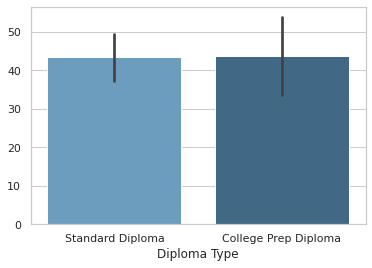

In [24]:
#Question Six

#bar chart for diploma types
sns.set_theme(style="whitegrid")


ax=sns.barplot(x=alumni_data['Diploma Type'],y=alumni_data.index,data=alumni_data, palette="Blues_d" )



alumni_data["Diploma Type"].value_counts()

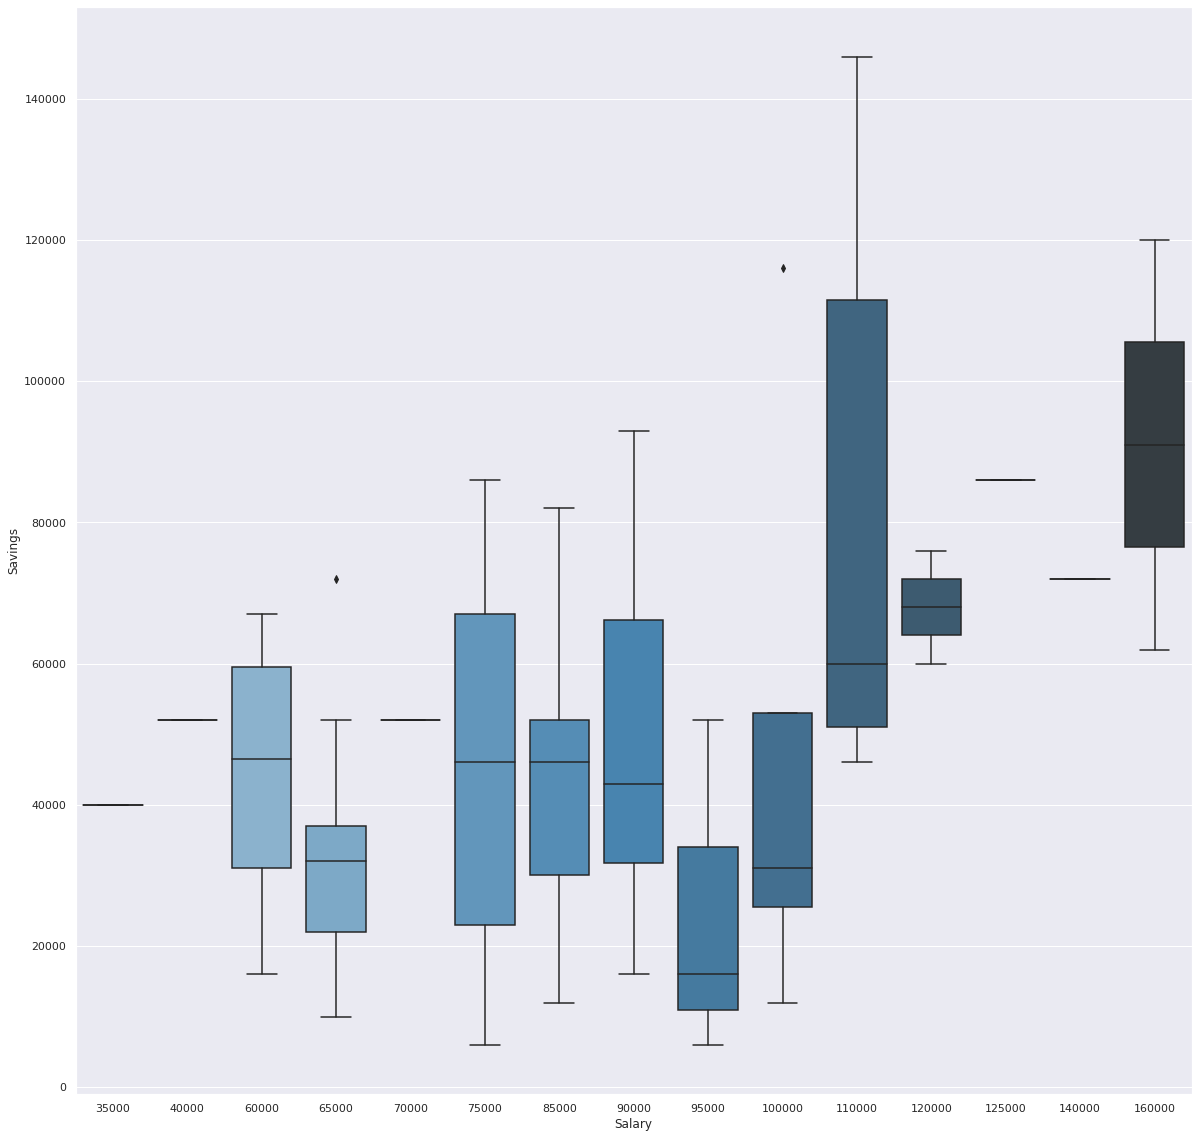

In [31]:
#box chart of savings vs salary
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,20)})
ax=sns.boxplot(x="Salary", y="Savings",data=alumni_data,palette="Blues_d")

<Figure size 1152x720 with 0 Axes>

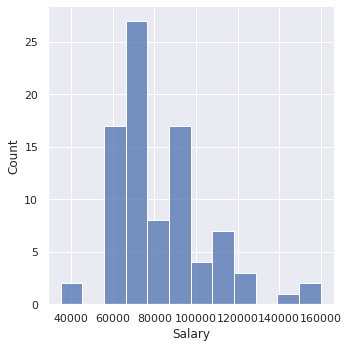

<Figure size 1152x720 with 0 Axes>

In [36]:
#histogram with salary 12 bins
ax=sns.displot(alumni_data, x="Salary",bins=12)
plt.figure(figsize=(16,10))

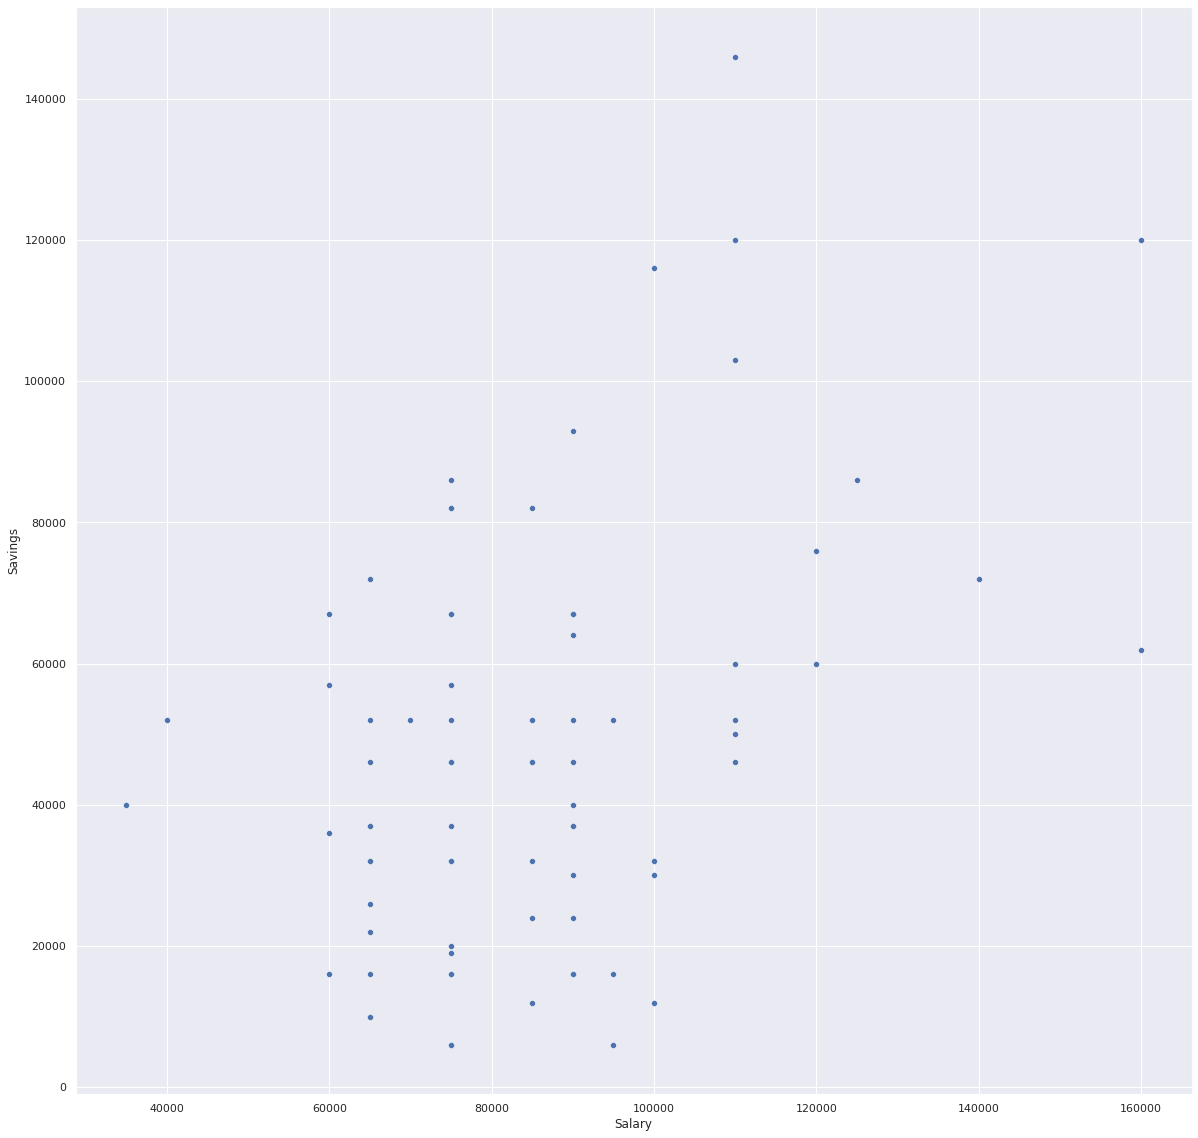

In [37]:
#scatter plot of salary and savings
ax=sns.scatterplot(data=alumni_data, x="Salary", y="Savings")

In [38]:
#Question 7

contingency_matrix = pd.crosstab(alumni_data["Marital Status"],alumni_data["Defaulted"])
print (contingency_matrix)

Defaulted       No  Yes
Marital Status         
Divorced         8   11
Married         19   16
Single           9   25
